# Exploring GPR

Following a great lecture by Professor Anna Scaife I decided to reproduce her figures. Source: https://youtu.be/UpsV1y6wMQ8

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

## Styles
csfont = {'fontname':'Charter', 'fontweight':'regular'}
hfont = {'fontname':'Charter', 'fontweight':'bold'}
font_label = 22
font_axis = 12
font_title = 22
lineColour = '#f44242'

def set_labels_in_Charter(x, y):
    
    # Set the tick labels font
    for label in (x):
        label.set_fontname('Charter')
        label.set_fontweight('regular')
        label.set_fontsize(font_axis)

    for label in (y):
        label.set_fontname('Charter')
        label.set_fontweight('regular')
        label.set_fontsize(font_axis)

# GP Kernel - Squared Exponential:
def kernelSE(x1, x2, h, lam):

    k12 = h**2*np.exp(-1.*(x1 - x2)**2/lam**2)

    return k12

# Covariance matrix from kernel:
def covMatrixSE(x, h, lam):

    K = np.zeros((len(x), len(x)))

    for i in range(0, len(x)):
        for j in range (0, len(x)):

            K[i,j] = kernelSE(x[i], x[j], h, lam)

    return K

## Plotting joint probability distribution of variables:

[[2. 1.]
 [1. 1.]]


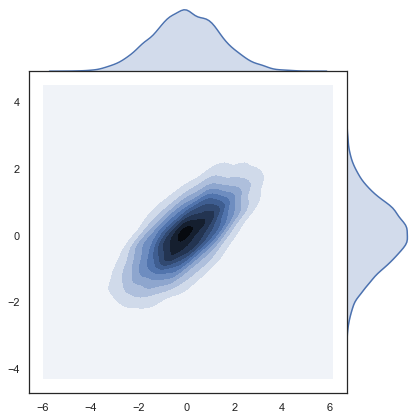

In [56]:
# Generate diagonal covariance matrix:
Cov = np.zeros((2,2))
Cov[0,0] = 2
Cov[1,1] = 1
Cov[0,1] = 1
Cov[1,0] = 1
print(Cov)
mean = [0,0]

x, y = np.random.multivariate_normal(mean, Cov, 10000).T
d = {'x_1': x, 'x_2': y}
g = sns.jointplot(x="x_1", y="x_2", data=d, kind="kde", space=0, color="b")

## The effect of changing the kernel scaling $h$



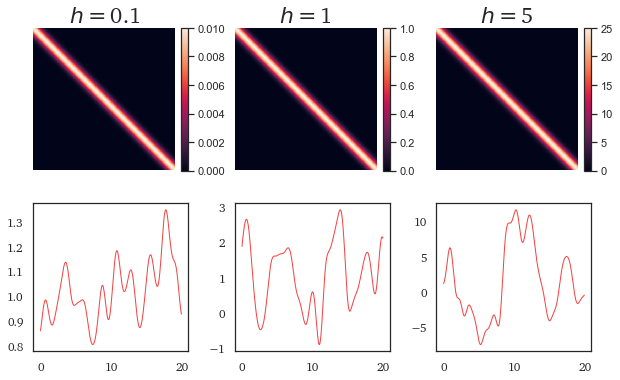

In [57]:
# Set hyperparameters:
lam = 1
h = [0.1, 1, 5]
mean = 1

x = np.arange(0, 20, 0.05)

# Display covariance matrix:
figure = plt.figure(figsize=(10, 6))

for idx, i in enumerate(h):

    # Generate covariance matrix:
    Cov = covMatrixSE(x, i, lam)

    # Draw realization from the current covariance:
    y = np.random.multivariate_normal(mean*np.ones(len(x)), Cov)

    figureSubplot = figure.add_subplot(2,3,idx+1)
    im = plt.imshow(Cov)
    plt.yticks([]), plt.xticks([])
    plt.title('$h = $' + str(i), **csfont, fontsize=font_title)
    cb = plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.clim(0,i**2)
    figureSubplot.spines["top"].set_visible(False)
    figureSubplot.spines["bottom"].set_visible(False)
    figureSubplot.spines["right"].set_visible(False)
    figureSubplot.spines["left"].set_visible(False)
    set_labels_in_Charter(figureSubplot.get_xticklabels(), figureSubplot.get_yticklabels())

    figureSubplot = figure.add_subplot(2,3,idx+4)
    plt.plot(x, y, color=lineColour, linewidth=1)
    set_labels_in_Charter(figureSubplot.get_xticklabels(), figureSubplot.get_yticklabels())

plt.subplots_adjust(wspace=0.3, hspace=0.2)

## The effect of changing the kernel width $\lambda$

Quote from [1]: 
> Lengthscale parameter of the SE kernel specifies the width of the kernel and thereby the smoothness of the functions in the model.

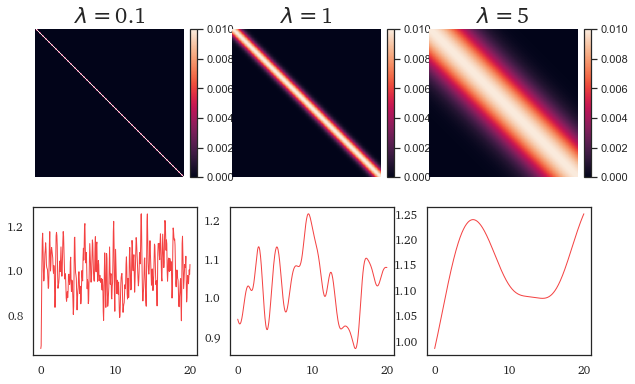

In [58]:
# Set hyperparameters:
lam = [0.1, 1, 5]
h = 0.1
mean = 1

x = np.arange(0, 20, 0.05)

# Display covariance matrix:
figure = plt.figure(figsize=(10, 6))

for idx, i in enumerate(lam):

    # Generate covariance matrix:
    Cov = covMatrixSE(x, h, i)

    # Draw realization from the current covariance:
    y = np.random.multivariate_normal(mean*np.ones(len(x)), Cov)

    figureSubplot = figure.add_subplot(2,3,idx+1)
    im = plt.imshow(Cov)
    plt.yticks([]), plt.xticks([])
    plt.title('$\lambda = $' + str(i), **csfont, fontsize=font_title)
    cb = plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.clim(0,h**2)
    figureSubplot.spines["top"].set_visible(False)
    figureSubplot.spines["bottom"].set_visible(False)
    figureSubplot.spines["right"].set_visible(False)
    figureSubplot.spines["left"].set_visible(False)
    set_labels_in_Charter(figureSubplot.get_xticklabels(), figureSubplot.get_yticklabels())

    figureSubplot = figure.add_subplot(2,3,idx+4)
    plt.plot(x, y, color=lineColour, linewidth=1)
    set_labels_in_Charter(figureSubplot.get_xticklabels(), figureSubplot.get_yticklabels())


## Histogram of prior realisations

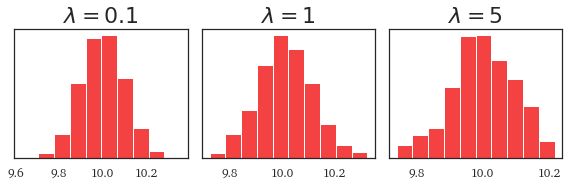

In [59]:
# Set hyperparameters:
lam = [0.1, 1, 5]
h = 0.1
mean = 10

x = np.arange(0, 20, 0.05)

# Display covariance matrix:
figure = plt.figure(figsize=(8, 3))

for idx, i in enumerate(lam):

    # Generate covariance matrix:
    Cov = covMatrixSE(x, h, i)

    # Draw realization from the current covariance:
    y = np.random.multivariate_normal(mean*np.ones(len(x)), Cov)

    # Append nRel number of realisations:
    nRel = 19

    for rel in range(1,1+nRel):
        y = np.append(y, np.random.multivariate_normal(10*np.ones(len(x)), Cov))

    figureSubplot = figure.add_subplot(1,3,idx+1)

    plt.hist(y, color=lineColour)
    plt.title(('$\lambda = ' + str(i) + '$'), **csfont, fontsize=font_title)
    plt.yticks([])
    set_labels_in_Charter(figureSubplot.get_xticklabels(), figureSubplot.get_yticklabels())

plt.subplots_adjust(wspace=0.3, hspace=0.2)
figure.tight_layout(rect=[0, 0.03, 1, 0.95])

[1] David Kristjanson Duvenaud, *Automatic Model Contruction with Gaussian Processes*, PhD thesis, University of Cambridge, 2014